In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



df = pd.read_csv(r"C:\Gachon\3-1\인공지능개론\car_evaluation.csv", index_col=None)

df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# 모든 범주형 데이터를 숫자로 변환
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X=df.drop('class',axis=1)
X.head()
y=df['class']
y.value_counts()
y.head()

Y = pd.get_dummies(y).values

X = X.values
X
y
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1381, 6), (346, 6), (1381, 4), (346, 4))

In [5]:
print(X_train.shape)  # X_train의 차원 확인

(1381, 6)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\cha08\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390 (1.52 KB)

 Trainable params: 390 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6373 - loss: 0.4565 - val_accuracy: 0.7122 - val_loss: 0.2989
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.2795 - val_accuracy: 0.7914 - val_loss: 0.2545
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7575 - loss: 0.2683 - val_accuracy: 0.8561 - val_loss: 0.1991
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8234 - loss: 0.1940 - val_accuracy: 0.8777 - val_loss: 0.1665
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8197 - loss: 0.1887 - val_accuracy: 0.7626 - val_loss: 0.2279
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8340 - loss: 0.1805 - val_accuracy: 0.8561 - val_loss: 0.1632
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.1740 - val_accuracy: 0.8201 - val_loss: 0.1945
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.1776 - val_accuracy: 0.8633 - val_loss:

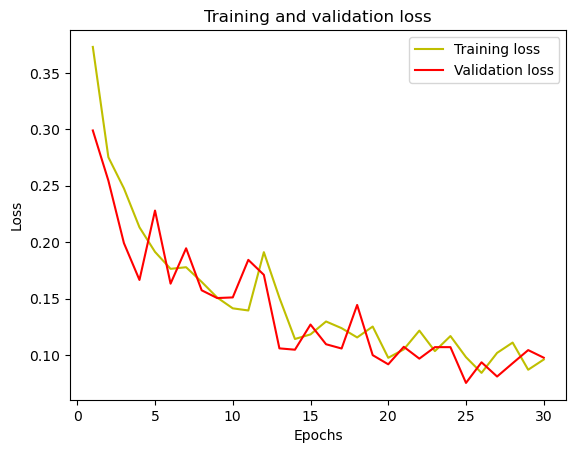

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

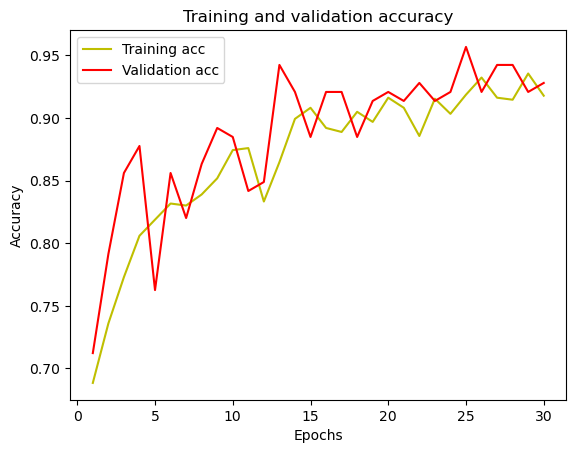

In [17]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        77
           1       0.33      0.36      0.34        14
           2       1.00      0.97      0.98       239
           3       0.55      1.00      0.71        16

    accuracy                           0.91       346
   macro avg       0.69      0.78      0.72       346
weighted avg       0.92      0.91      0.91       346

[[ 62  10   1   4]
 [  0   5   0   9]
 [  8   0 231   0]
 [  0   0   0  16]]
